<a href="https://colab.research.google.com/github/KwakuBonfulBosompim/MSc-Data-Analytics-and-ML-Projects/blob/main/MovieLens_PCA_%26_Clustering_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Principal Component Analysis (PCA)


All in the name of reducing overfitting or underfitting
Remove Unuseful Dimensions so we apply PCA

Imagine you walk into a huge library full of movies.
Each movie has lots of stickers on it – like Action, Comedy, Romance, Horror, Sci-Fi.

Some movies have many stickers (lots of genres), and some only one or two.
Now, if I ask you:
👉 “Find me movies that are kind of like Harry Potter”
How do you do it quickly in this giant library?

That’s what this project is about!

This project demonstrates the use of Principal Component Analysis (PCA) and Clustering techniques on the MovieLens dataset (genres data).
The main idea is to reduce dimensionality, visualize movies in lower dimensions, and then cluster similar movies based on their genre composition

Business Case Example:
When new users join a movie recommendation platform (cold-start problem), there are no user ratings yet. Instead of relying on ratings, we can:

Use movie metadata (genres) to find groups of similar movies.

Assign cluster labels to movies.

Build a simple recommender: “Tell me a movie you like, I’ll recommend another similar one from the same cluster.”

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

What could we use PCA for in the MovieLens Data

we can have movies as observations, described by a number of user ratings (each user being a feature, 600 features)
  idea: use PCa for dimensionality reduction
  find groups of similar movies
We can have users as observations, described by a number of movie ratings
  idea: use PCA for dimensionaliy reduction
  find group of similar users
We can have the movies as observations, described by a number of genres(each genre being a feature, 20 features)
  idea: use PCA for dimensionality reduction
  find groups of similar movies

PCA on movie Genres

Example business case: cold start - there are no user ratings yet

For a simple recommender
  tell me a movie you like and i will recommend a similar one based on genres
  find groups of similar movies and label them as such = we could use PCA  + Clustering to create labels

Follow the steps of the PCA encounter to apply a PCA on the movie genres

**Data Preparation**

Load the dataset with Pandas.

In [28]:
movies = pd.read_csv('movies_genres.csv', index_col='movieid')
movies

,title,year,romance,sci-fi,animation,film-noir,musical,adventure,thriller,horror,...,fantasy,mystery,children,comedy,crime,western,imax,war,drama,action
movieid,,,,,,,,,,,,,,,,,,,,,
1,Toy Story,1995.0,0,0,1,0,0,1,0,0,...,1,0,1,1,0,0,0,0,0,0
2,Jumanji,1995.0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
3,Grumpier Old Men,1995.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Waiting to Exhale,1995.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5,Father of the Bride Part II,1995.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,Black Butler: Book of the Atlantic,2017.0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
193583,No Game No Life: Zero,2017.0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
193585,Flint,2017.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


movies_genres.csv (9,742 movies × 21 columns)

Columns:

Movie details: title, year

Genres (binary features): e.g., romance, sci-fi, animation, thriller, etc. (19 genres)

Each movie is represented as a binary vector (1 = belongs to that genre, 0 = not).

In [29]:
movies

,title,year,romance,sci-fi,animation,film-noir,musical,adventure,thriller,horror,...,fantasy,mystery,children,comedy,crime,western,imax,war,drama,action
movieid,,,,,,,,,,,,,,,,,,,,,
1,Toy Story,1995.0,0,0,1,0,0,1,0,0,...,1,0,1,1,0,0,0,0,0,0
2,Jumanji,1995.0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
3,Grumpier Old Men,1995.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Waiting to Exhale,1995.0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5,Father of the Bride Part II,1995.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,Black Butler: Book of the Atlantic,2017.0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
193583,No Game No Life: Zero,2017.0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
193585,Flint,2017.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9742 entries, 1 to 193609
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9729 non-null   object 
 1   year         9729 non-null   float64
 2   romance      9742 non-null   int64  
 3   sci-fi       9742 non-null   int64  
 4   animation    9742 non-null   int64  
 5   film-noir    9742 non-null   int64  
 6   musical      9742 non-null   int64  
 7   adventure    9742 non-null   int64  
 8   thriller     9742 non-null   int64  
 9   horror       9742 non-null   int64  
 10  documentary  9742 non-null   int64  
 11  fantasy      9742 non-null   int64  
 12  mystery      9742 non-null   int64  
 13  children     9742 non-null   int64  
 14  comedy       9742 non-null   int64  
 15  crime        9742 non-null   int64  
 16  western      9742 non-null   int64  
 17  imax         9742 non-null   int64  
 18  war          9742 non-null   int64  
 19  drama    

Why Do This? (Business Case)

Imagine you’re starting a new movie website.

A new user signs up but hasn’t rated any movies yet. (This is called the cold start problem).

You can’t recommend movies based on ratings… because they haven’t rated anything!

But you can say:

“Tell me one movie you like, I’ll find other movies from the same cluster!”

That’s how we can recommend movies without ratings.

In [31]:
movies.describe()

,year,romance,sci-fi,animation,film-noir,musical,adventure,thriller,horror,documentary,fantasy,mystery,children,comedy,crime,western,imax,war,drama,action
count,9729.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000
mean,1994.613629,0.163827,0.100595,0.062718,0.008930,0.034285,0.129645,0.194416,0.100390,0.045165,0.079963,0.058817,0.068158,0.385547,0.123075,0.017142,0.016218,0.039212,0.447649,0.187641
std,18.535219,0.370137,0.300808,0.242468,0.094083,0.181968,0.335930,0.395771,0.300535,0.207677,0.271250,0.235295,0.252031,0.486749,0.328541,0.129808,0.126321,0.194108,0.497277,0.390445
min,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1988.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2018.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Drop non-numerical columns (title, year).

Features = 19 genre columns.

In [32]:
X = movies.drop(['title', 'year'], axis=1)

 Standardizing the data.

Apply PCA to reduce 19-dimensional genre space into fewer components.

Inspect explained variance to decide how many PCs to keep.

Think of PCA (Principal Component Analysis) like a magic shrinking machine.

We have movies described by 19 stickers (genres).

That’s too many to compare by eye.

PCA squishes all those 19 stickers into just 2 or 3 super-stickers (PC1, PC2, PC3).

With fewer stickers, it’s easier to draw pictures and see patterns.

We used PCA (shrink genres) + Clustering (make friend groups) → to organize movies into meaningful groups.

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [34]:
pca = PCA()
w = pca.fit_transform(X)

Variance explained by each of the components

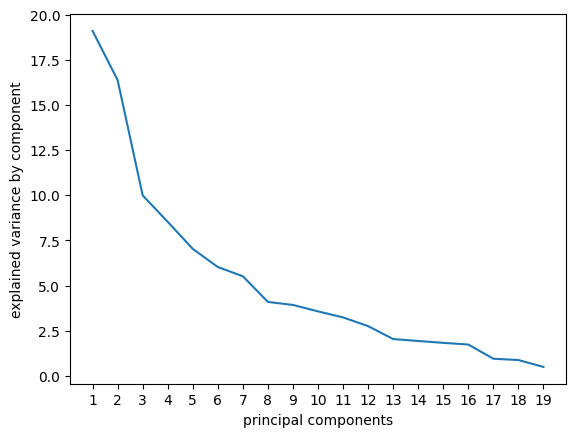

In [35]:
plt.plot(np.arange(1, w.shape[1]+1), pca.explained_variance_ratio_*100)
plt.xlabel('principal components')
plt.ylabel('explained variance by component')
plt.xticks(np.arange(1,w.shape[1]+1))
plt.show()

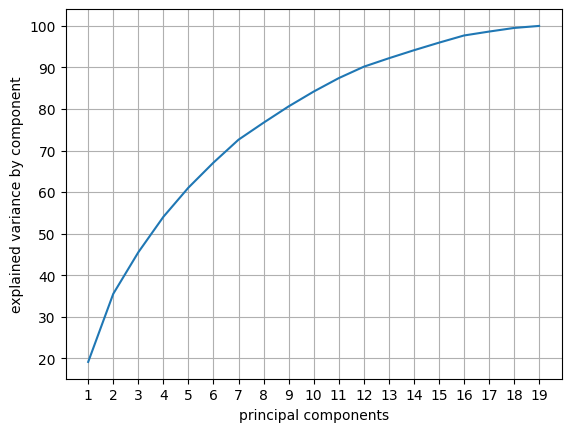

In [36]:
plt.plot(np.arange(1, w.shape[1]+1), np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('principal components')
plt.ylabel('explained variance by component')
plt.xticks(np.arange(1, w.shape[1]+1))
plt.grid()
plt.show()

Plot in 2D

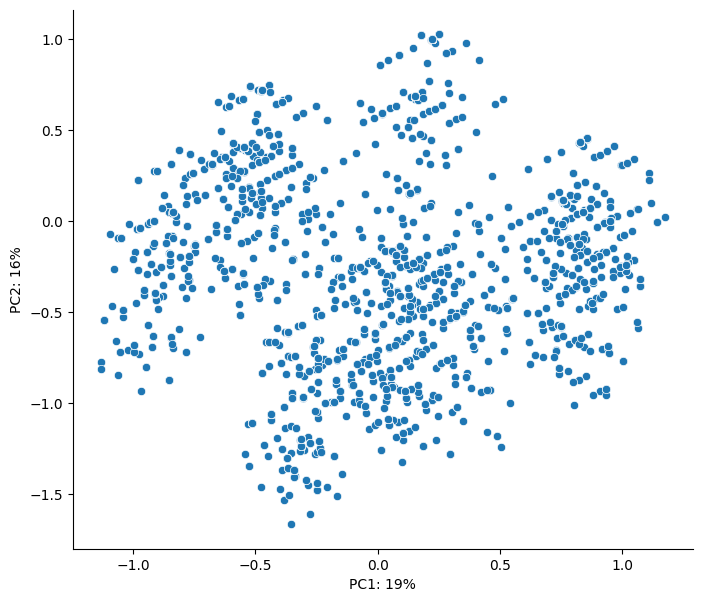

In [37]:
movies['pca_1'] = w[:,0]
movies['pca_2'] = w[:,1]

plt.figure(figsize=(8,7))
sns.scatterplot(data=movies, x='pca_1', y='pca_2')
plt.xlabel('PC1: '+f'{pca.explained_variance_ratio_[0]*100:.0f}'+'%')
plt.ylabel('PC2: '+f'{pca.explained_variance_ratio_[1]*100:.0f}'+'%')
sns.despine()

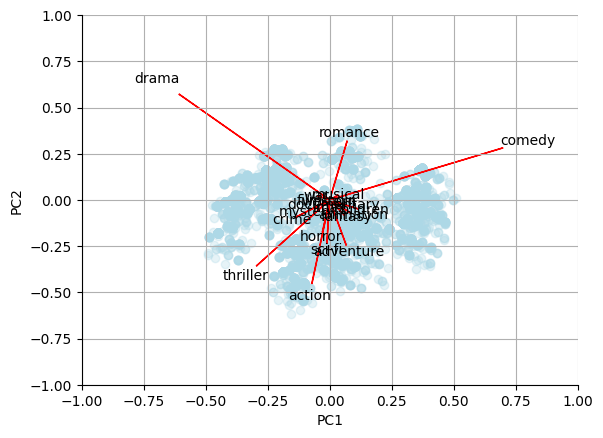

In [38]:
def biplot(score, coeff, labels=None):
  xs = score[:,0]
  ys = score[:,1]
  n = coeff.shape[0]
  scalex = 1.0/(xs.max() - xs.min())
  scaley = 1.0/(ys.max() - ys.min())
  plt.scatter(xs * scalex, ys * scaley, c = '#add8e6', alpha = 0.3)
  for i in range(n):
    plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r', alpha = 1)
    if labels is None:
      plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, 'Var'+str(i+1), color = 'k', ha='center', va = 'center')
    else:
      plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'k', ha = 'center', va = 'center')
  plt.xlim(-1,1)
  plt.ylim(-1,1)
  plt.xlabel('PC{}'.format(1))
  plt.ylabel('PC{}'.format(2))
  sns.despine()
  plt.grid()

biplot(w[:,0:2], np.transpose(pca.components_[0:2, :]), labels=X.columns)

Text(0.5, 1.0, 'Biplot of PCA with ingredients')

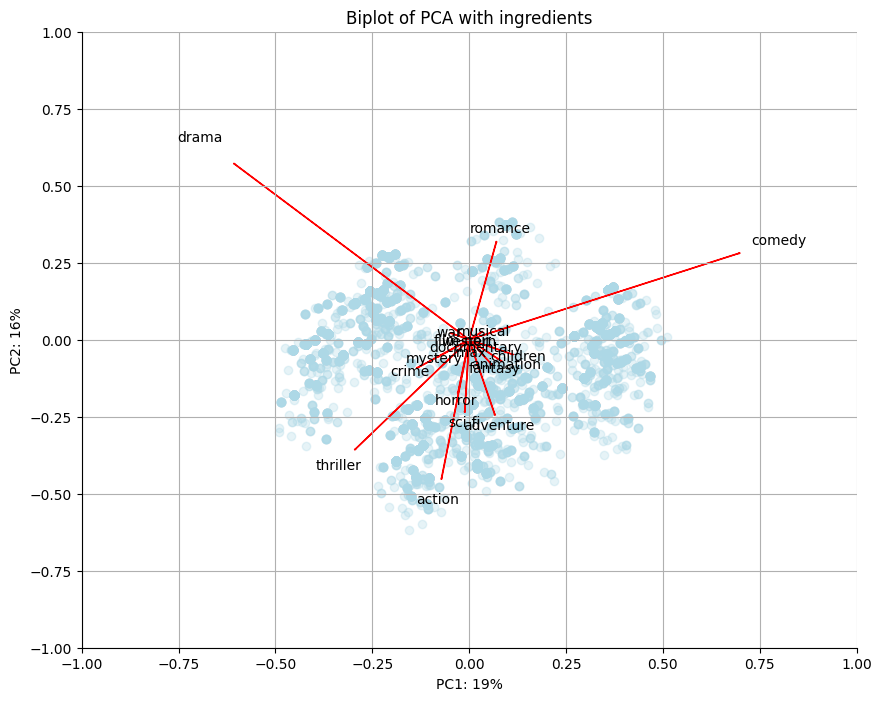

In [40]:
plt.figure(figsize=(10,8))
biplot(w[:,0:2], np.transpose(pca.components_[0:2, :]), labels = X.columns)
plt.xlabel('PC1: '+f'{pca.explained_variance_ratio_[0]*100:.0f}'+'%')
plt.ylabel('PC2: '+f'{pca.explained_variance_ratio_[1]*100:.0f}'+'%')
plt.title('Biplot of PCA with ingredients')

Plot in 2D to visualize the distribution of genres

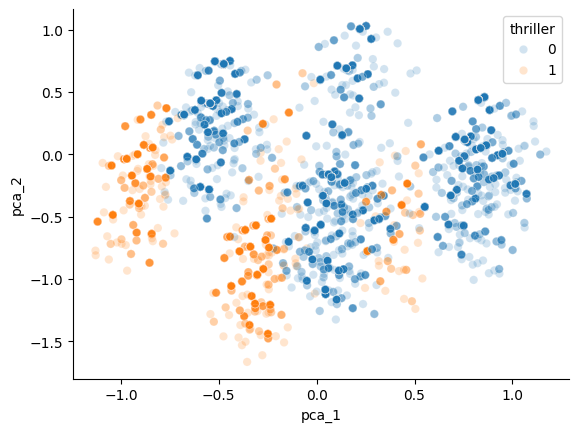

In [41]:
sns.scatterplot(data=movies, x='pca_1', y='pca_2', hue='thriller', legend=True, alpha=0.2)
sns.despine()

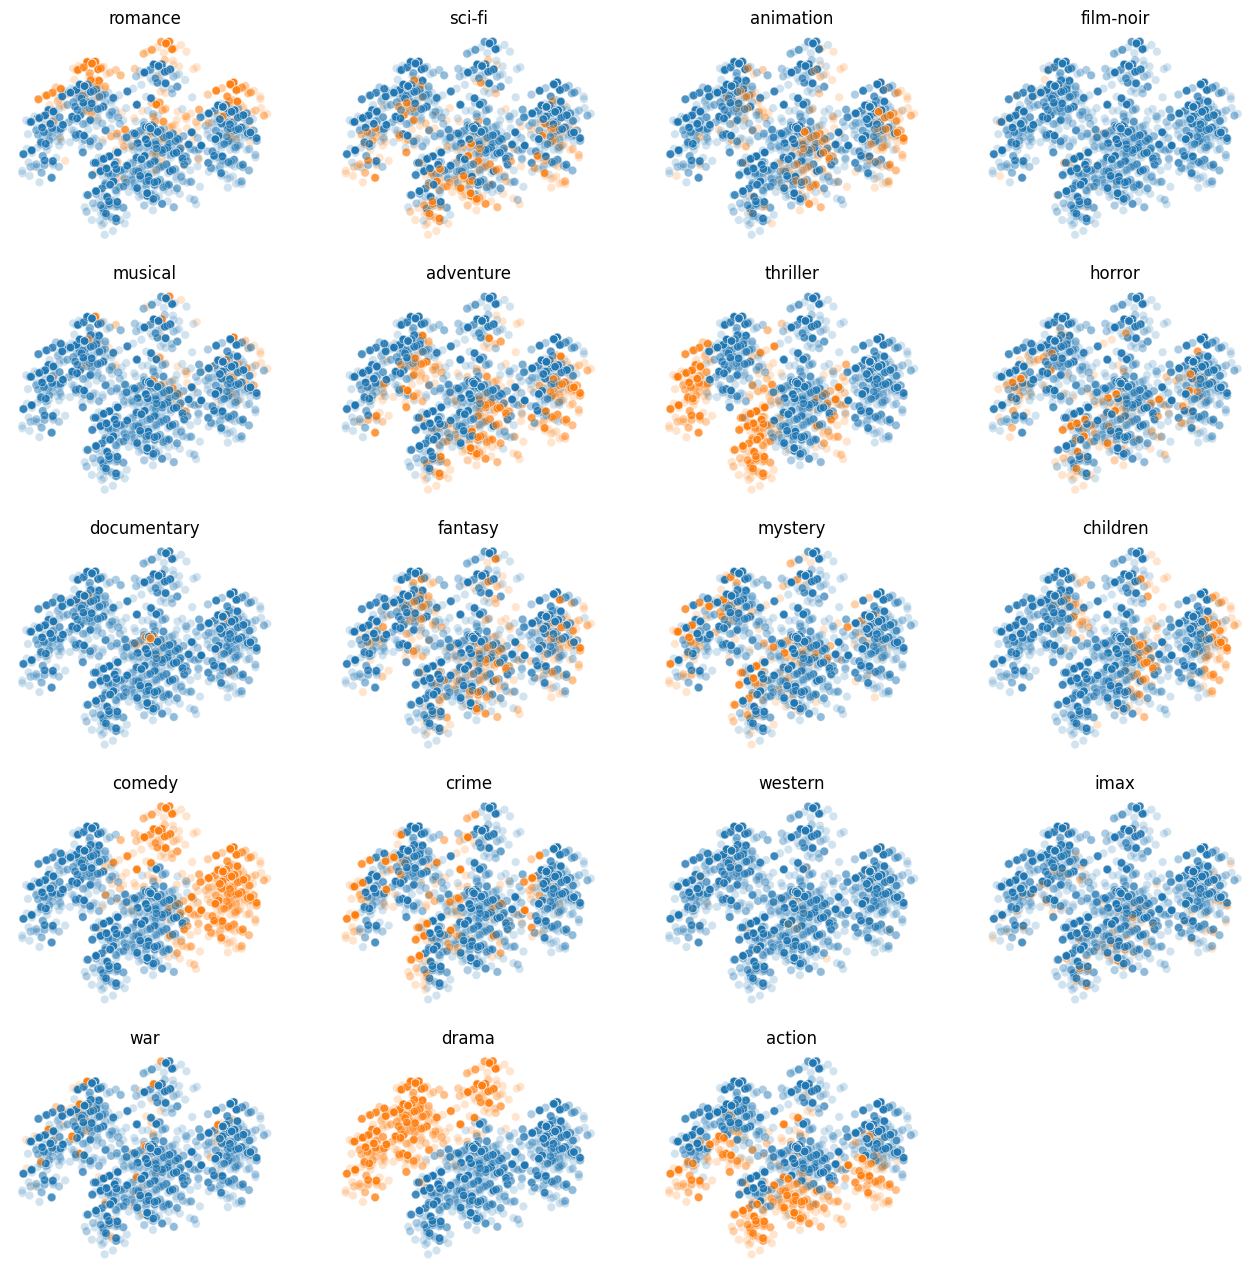

In [43]:
plt.figure(figsize=((16,16)))
for i,category in zip(np.arange(1,len(X.columns)+1), X.columns):
  plt.subplot(5,4, i)
  sns.scatterplot(data=movies, x='pca_1', y='pca_2', hue=category, legend=False, alpha=0.2)
  sns.despine()
  plt.title(category)
  plt.axis('off')

Clustering

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [46]:
inertia = []
silhouette = []

# let's try from 2 - 100 clustes and evaluate
for cluster_no in range(2, 100):
  clustering = KMeans(n_clusters=cluster_no, n_init=10, random_state=42)
  clustering.fit(w[:,0:9])
  inertia.append(clustering.inertia_)
  silhouette.append(silhouette_score(w[:,0:9], clustering.labels_))

ValueError: x and y must have same first dimension, but have shapes (998,) and (98,)

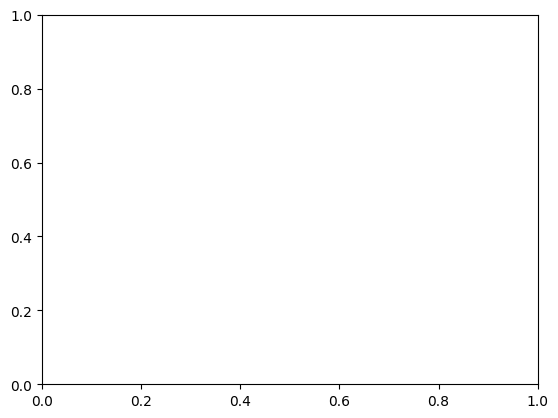

In [51]:
clusters = np.arange(2, 1000)
plt.plot(clusters, inertia)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.title('Inertia')
plt.xticks(ticks=clusters)
plt.show()

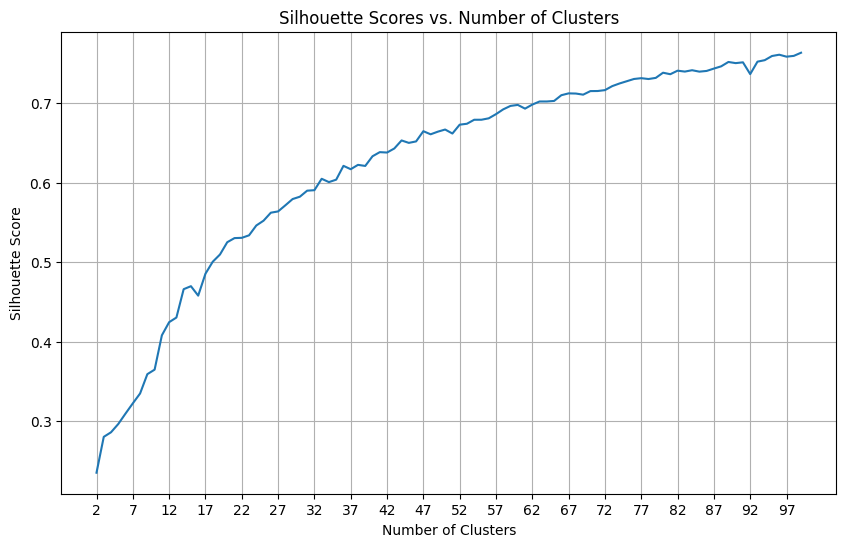

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(2, 100), silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores vs. Number of Clusters')
plt.xticks(np.arange(2, 100, 5))
plt.grid()
plt.show()

We have to apply new to make Clustering a good one